<a href="https://colab.research.google.com/github/IlyaGalyukshev/colab/blob/main/MNIST_simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import torch
import torch.nn as nn
import torchvision as tv
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

import pandas as pd

from tqdm import tqdm

In [103]:
transformer = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [104]:
ds_mnist = tv.datasets.MNIST('./', download=True, transform=transformer)

In [105]:
ds_mnist.data.shape

torch.Size([60000, 28, 28])

In [106]:
ds_mnist[0][0].numpy().shape

(1, 28, 28)

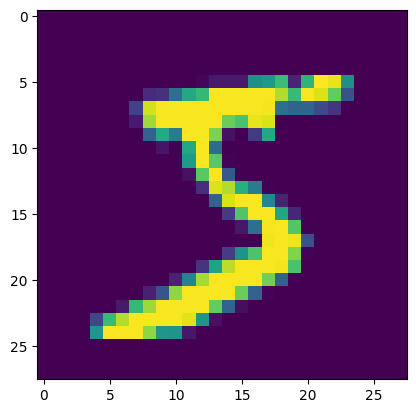

In [107]:
plt.imshow(ds_mnist[0][0].numpy()[0])

In [108]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(ds_mnist, batch_size=batch_size,
                                         shuffle=True, num_workers=0,
                                         drop_last=True)

In [109]:
print(dataloader.dataset.data.shape)
print(dataloader.batch_size)

torch.Size([60000, 28, 28])
16


In [110]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 100),
        nn.ReLU(),
        nn.Linear(100, 10))

  def forward(self, x):
    return self.model(x)

In [111]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__()

    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28 * 28, 100)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(100, 10)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

In [112]:
model = Model()

In [113]:
loss_fn = nn.CrossEntropyLoss()

In [114]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [115]:
def accuracy(predict, label):
  answer = F.softmax(predict.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  return answer.mean()

In [116]:
epoches = 3
for epoch in range(epoches):
  loss_value = 0
  accuracy_value = 0
  for img, label in (pbar := tqdm(dataloader)):
    optimizer.zero_grad()

    label = F.one_hot(label, 10).float()
    predict = model(img)

    loss = loss_fn(predict, label)
    loss.backward()
    loss_item = loss.item()
    loss_value += loss_item

    optimizer.step()

    current_acc = accuracy(predict, label)
    accuracy_value += current_acc

    pbar.set_description(f'loss: {loss_item:.5}\taccuracy: {current_acc}')

  print(loss_value / len(dataloader))
  print(accuracy_value / len(dataloader))

  0%|          | 0/3750 [00:00<?, ?it/s]<ipython-input-115-ad093383f8d7>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(predict.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.079144	accuracy: 1.0: 100%|██████████| 3750/3750 [00:36<00:00, 101.99it/s]


0.27893465201854706
0.9216666666666666


loss: 0.12884	accuracy: 0.9375: 100%|██████████| 3750/3750 [00:37<00:00, 99.80it/s] 


0.12282983578362812
0.9631333333333333


loss: 0.018982	accuracy: 1.0: 100%|██████████| 3750/3750 [00:37<00:00, 101.27it/s]

0.08525591308074072
0.9741666666666666


<ipython-input-153-aeed9f2e1d99>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res = F.softmax(model(tensor)).detach().numpy()


   numb   probability
5     6  9.812222e-01
8     9  1.702388e-02
2     3  1.642233e-03
9     0  1.056314e-04
3     4  5.831103e-06
0     1  2.246585e-07
7     8  1.140040e-09
6     7  6.321060e-10
1     2  2.855485e-10
4     5  2.691452e-11
(1, 1, 28, 28)


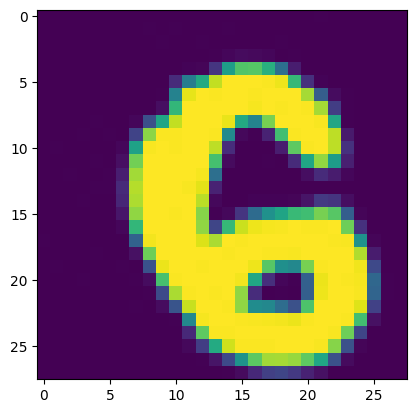

In [153]:
img = cv2.imread('6.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img = img[np.newaxis, np.newaxis].astype(np.float32)/255
tensor = torch.from_numpy(img)
res = F.softmax(model(tensor)).detach().numpy()
print(pd.DataFrame({
    'numb': (np.arange(10) + 1) % 10,
    'probability': res[0]
}).sort_values(by='probability', ascending=False))

print(img.shape)